In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
from experiment_analysis import analyze_and_plot_features

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'correlation_level': 0.5, 'base_increase_percentage': 0.05}
100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


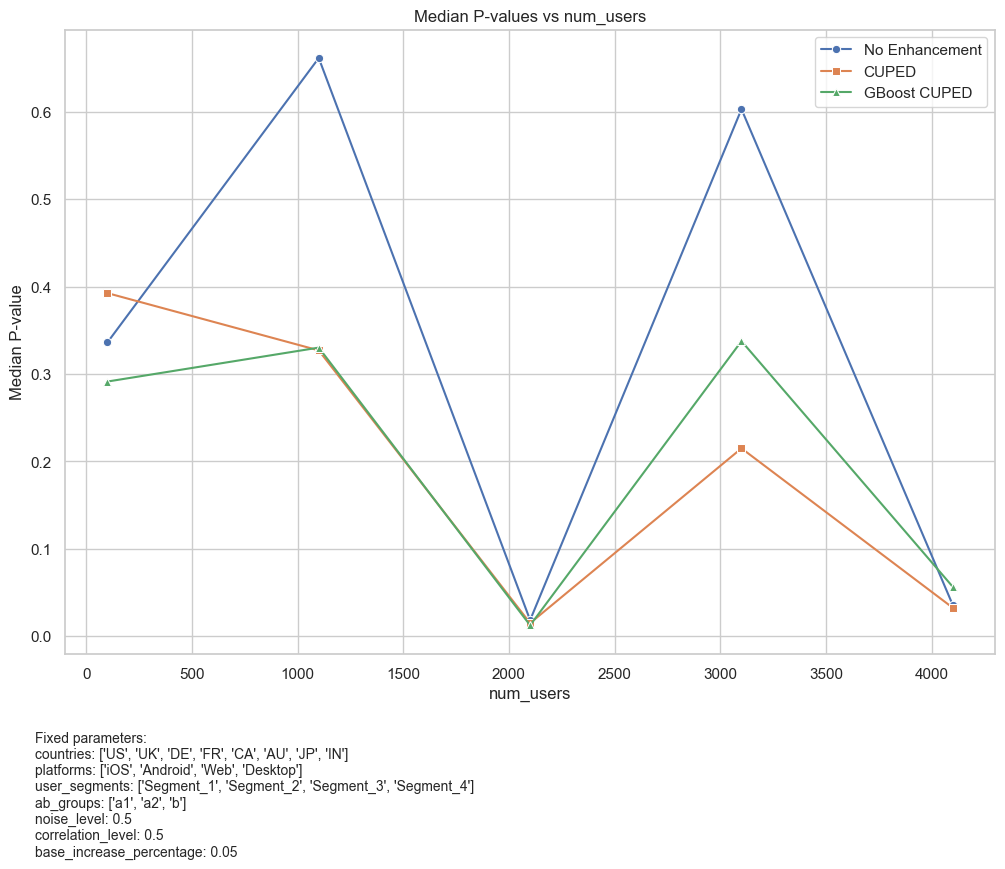

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'correlation_level': 0.5, 'base_increase_percentage': 0.15000000000000002}
100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


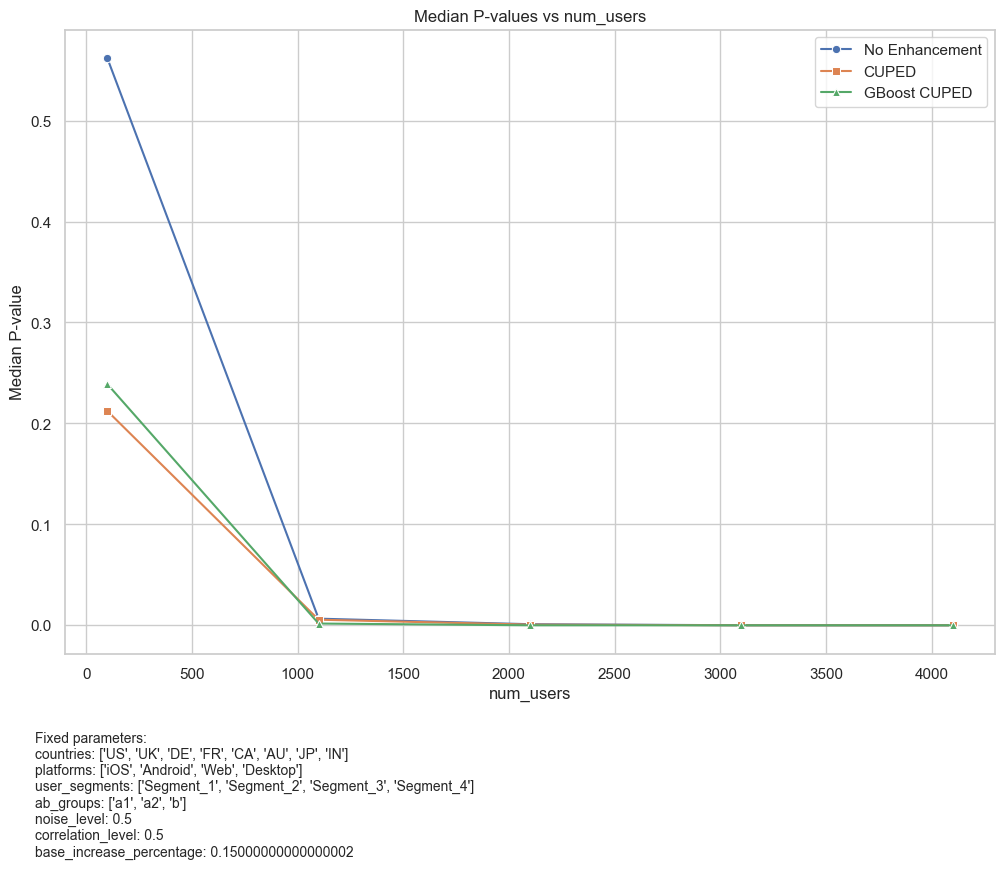

In [3]:
import numpy as np

# Define fixed parameters that do not change during the analysis
fixed_params = {
    'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],  # List of countries to be analyzed
    'platforms': ['iOS', 'Android', 'Web', 'Desktop'],  # Platforms to be included in the analysis
    'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],  # User segments to be considered
    'ab_groups': ['a1', 'a2', 'b'],  # A/B test groups
    
    'noise_level': 0.5,  # Noise level is fixed for all iterations
    'correlation_level': 0.5,  # Correlation level is fixed for all iterations
}

# Define parameters with ranges
varying_params = {
    'base_increase_percentage': np.arange(0.05, 0.20, 0.10),  # Range of base increase percentages to be analyzed
}

# Define parameters with ranges to be used as the X-axis
x_params = {
    'num_users': range(100, 5000, 1000)  # Range of user numbers to be used on the X-axis
}

# Call the function to analyze and plot for all selected features
analyze_and_plot_features(
    fixed_params, 
    varying_params, 
    x_params, 
    num_iterations=5,  # Number of iterations to perform for each analysis
    # num_iterations=50,  # Original higher number of iterations, can be used for more thorough analysis
)


INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'correlation_level': 0.0}
100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


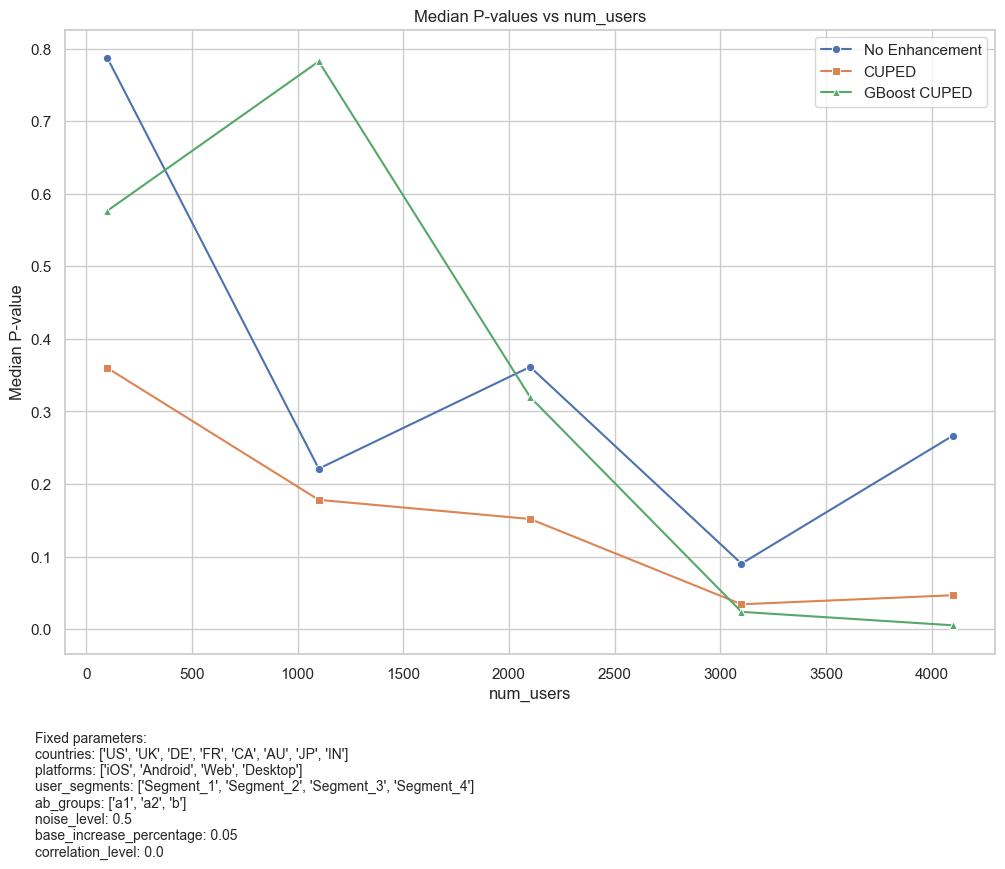

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'correlation_level': 0.5}
100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


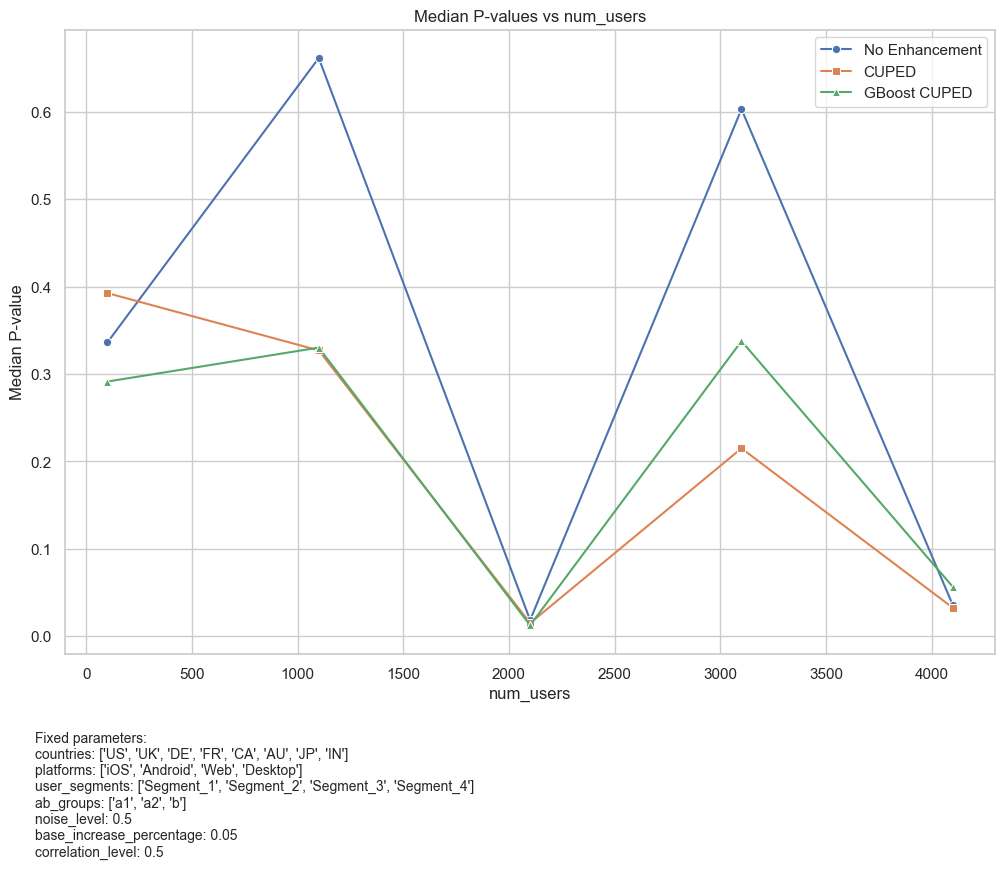

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'correlation_level': 0.0}
100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


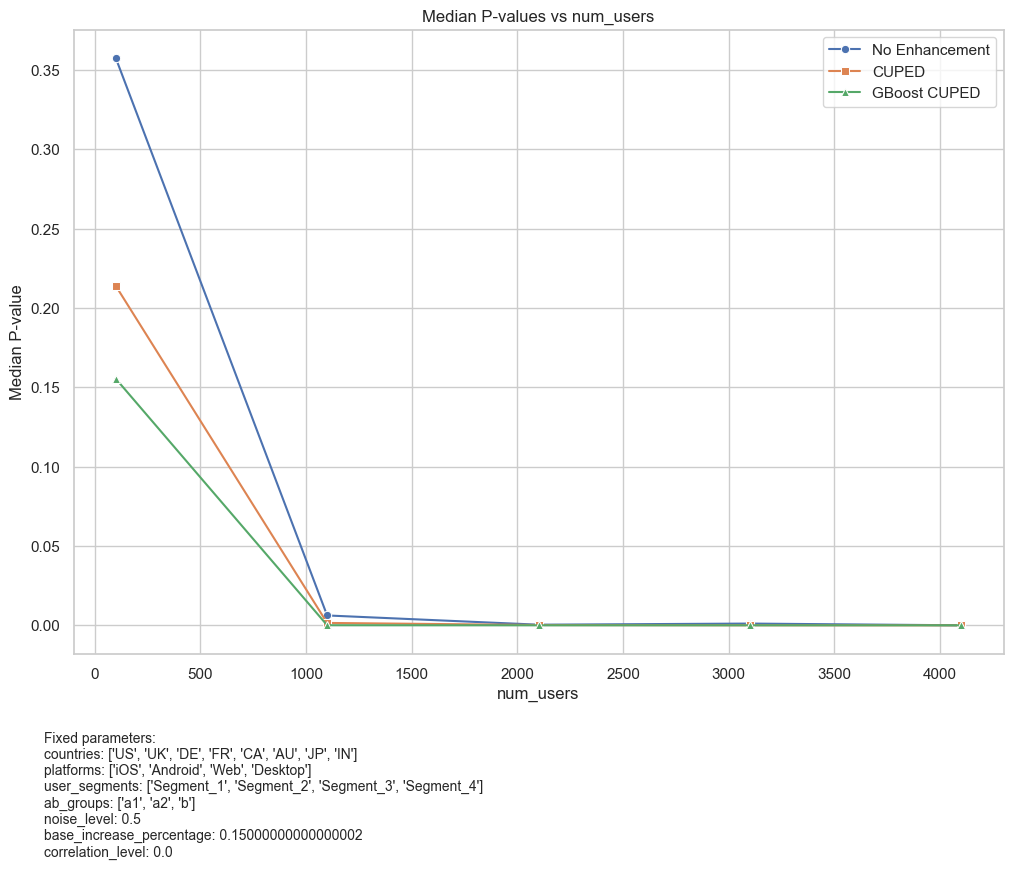

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'num_users' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'correlation_level': 0.5}
100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


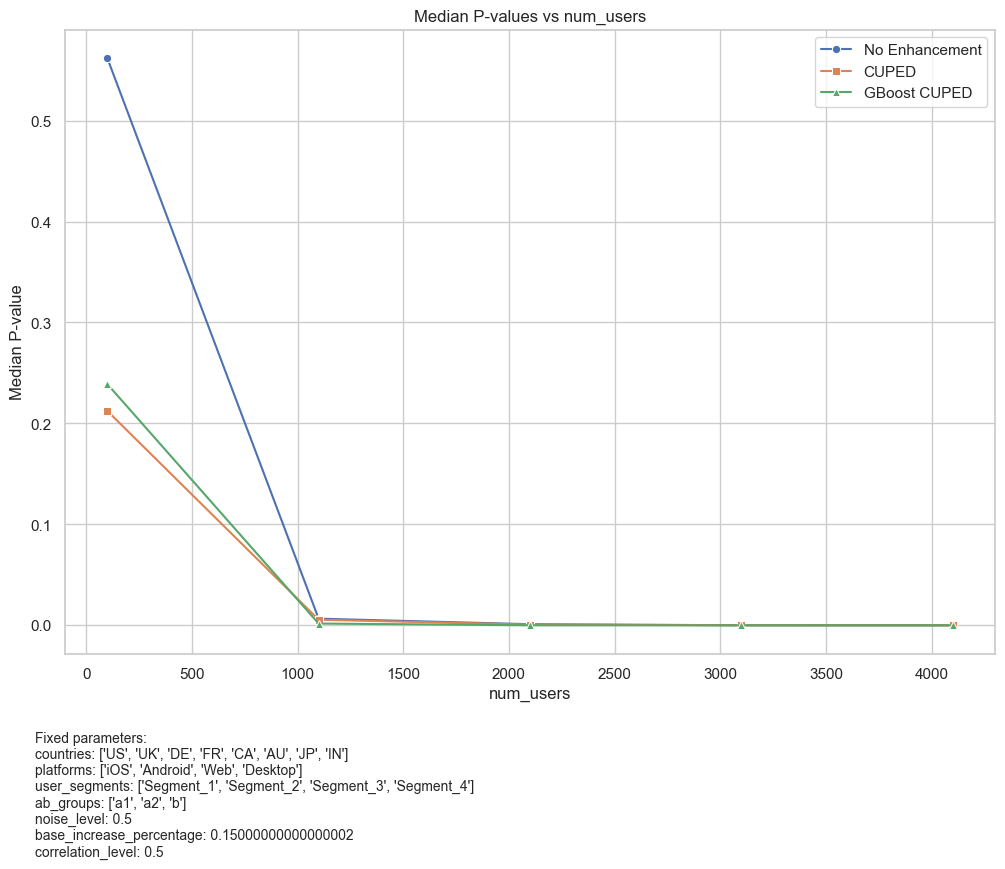

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'num_users': 100}
100%|██████████| 2/2 [00:01<00:00,  2.00it/s]


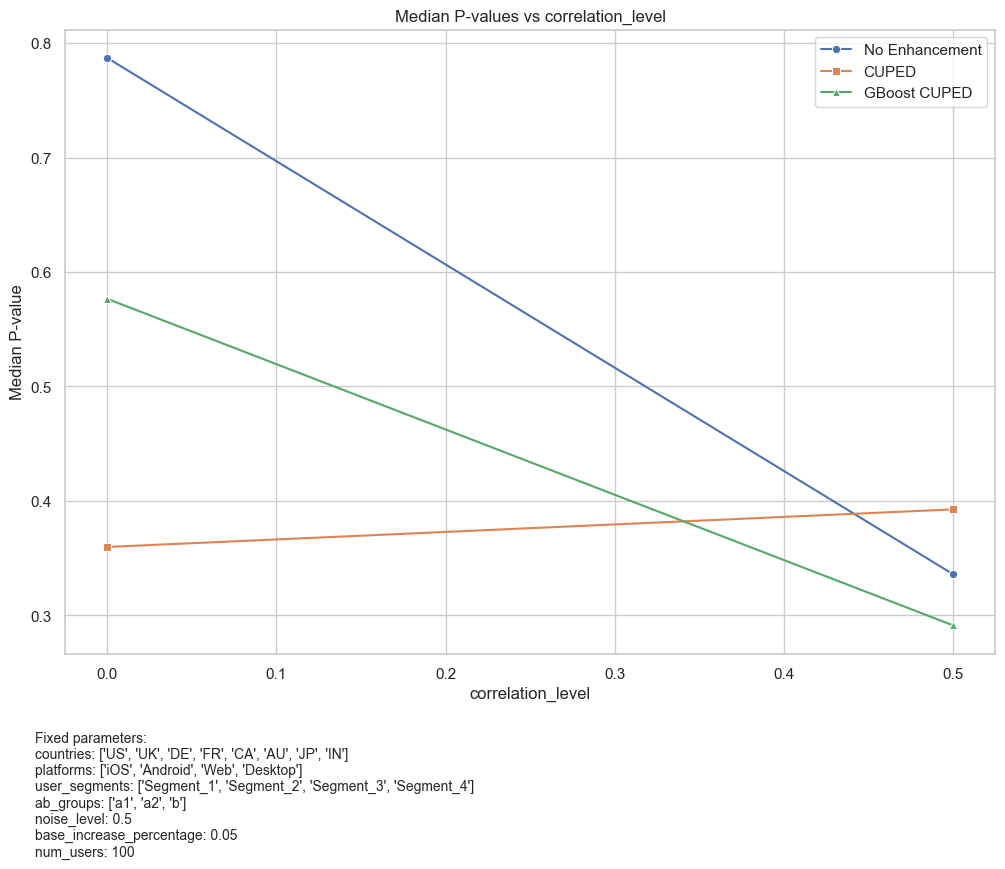

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'num_users': 1100}
100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


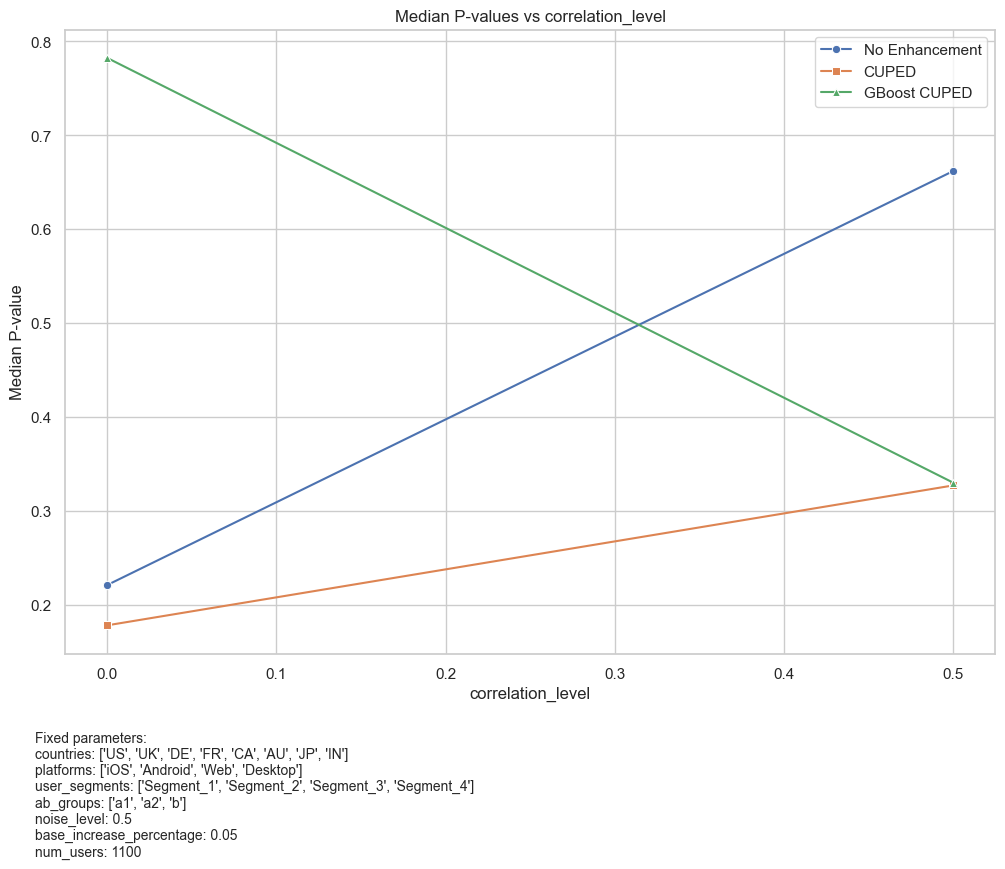

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'num_users': 2100}
100%|██████████| 2/2 [00:01<00:00,  1.60it/s]


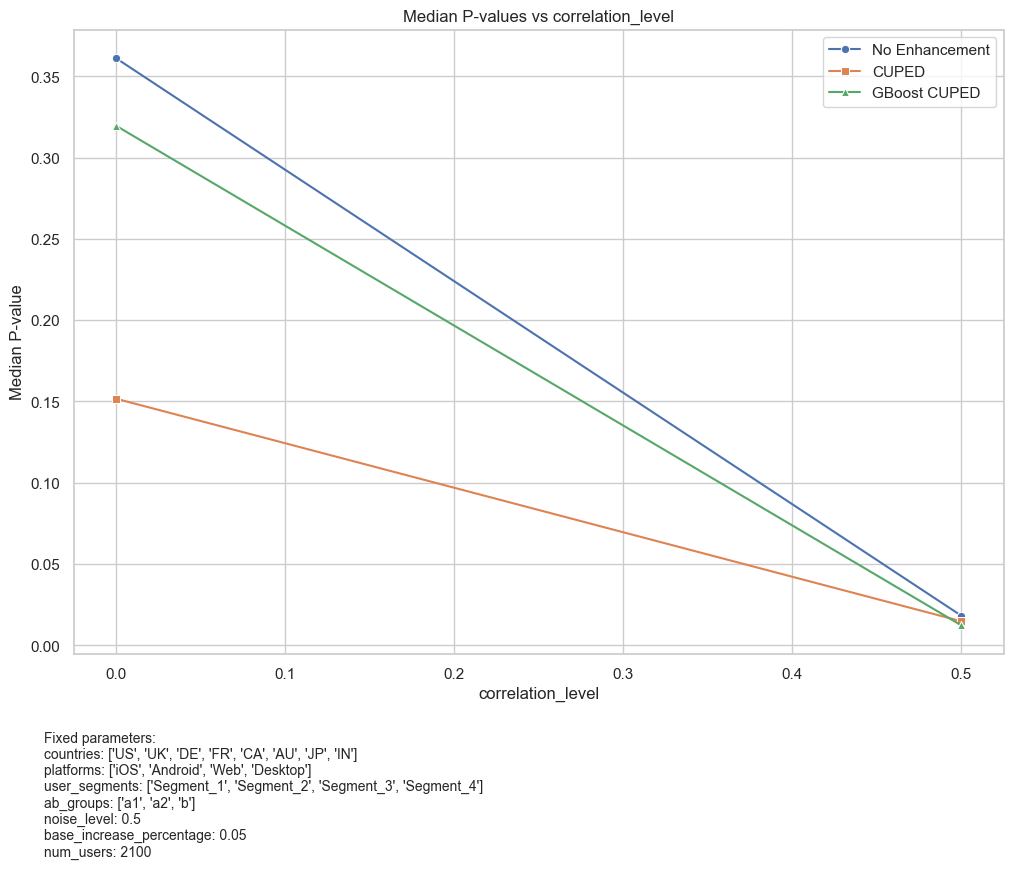

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'num_users': 3100}
100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


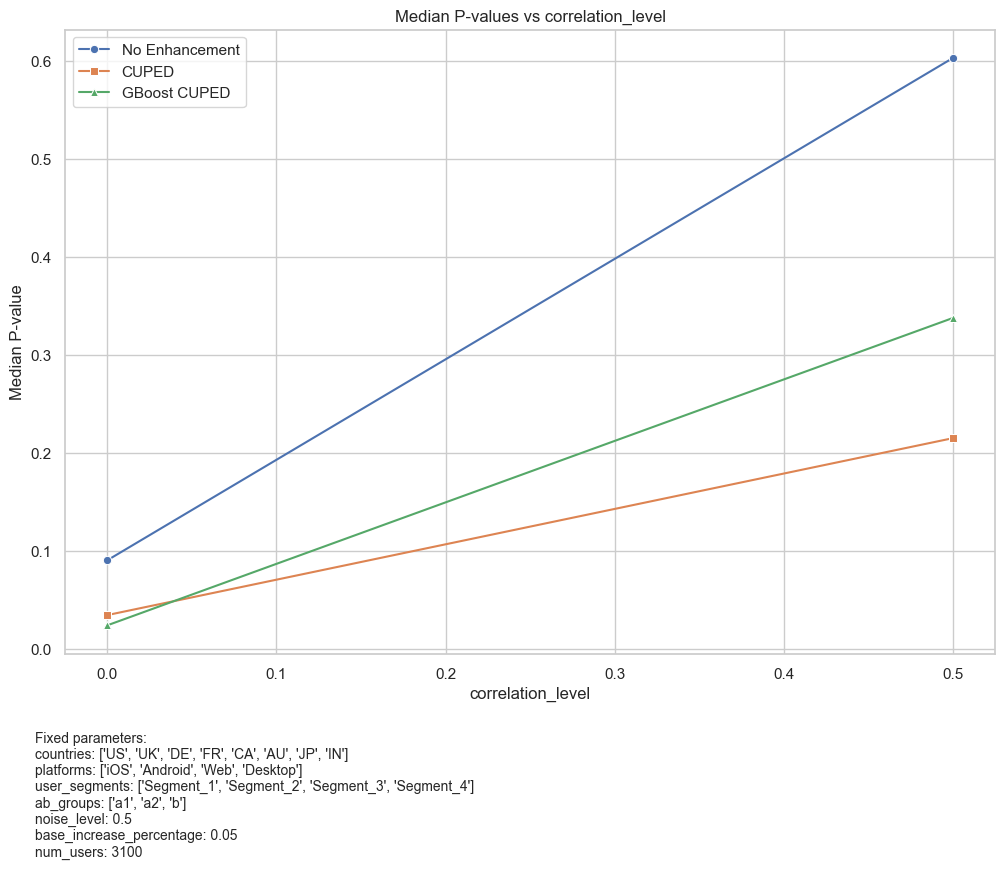

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.05, 'num_users': 4100}
100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


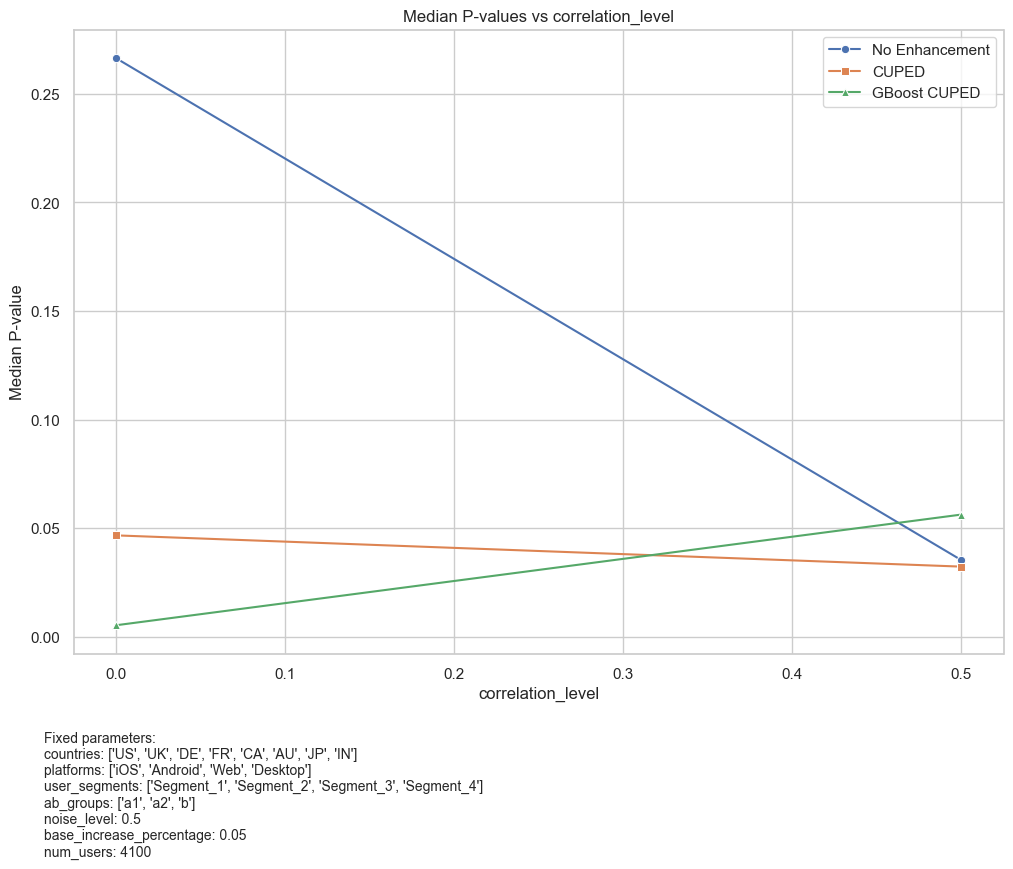

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'num_users': 100}
100%|██████████| 2/2 [00:01<00:00,  1.84it/s]


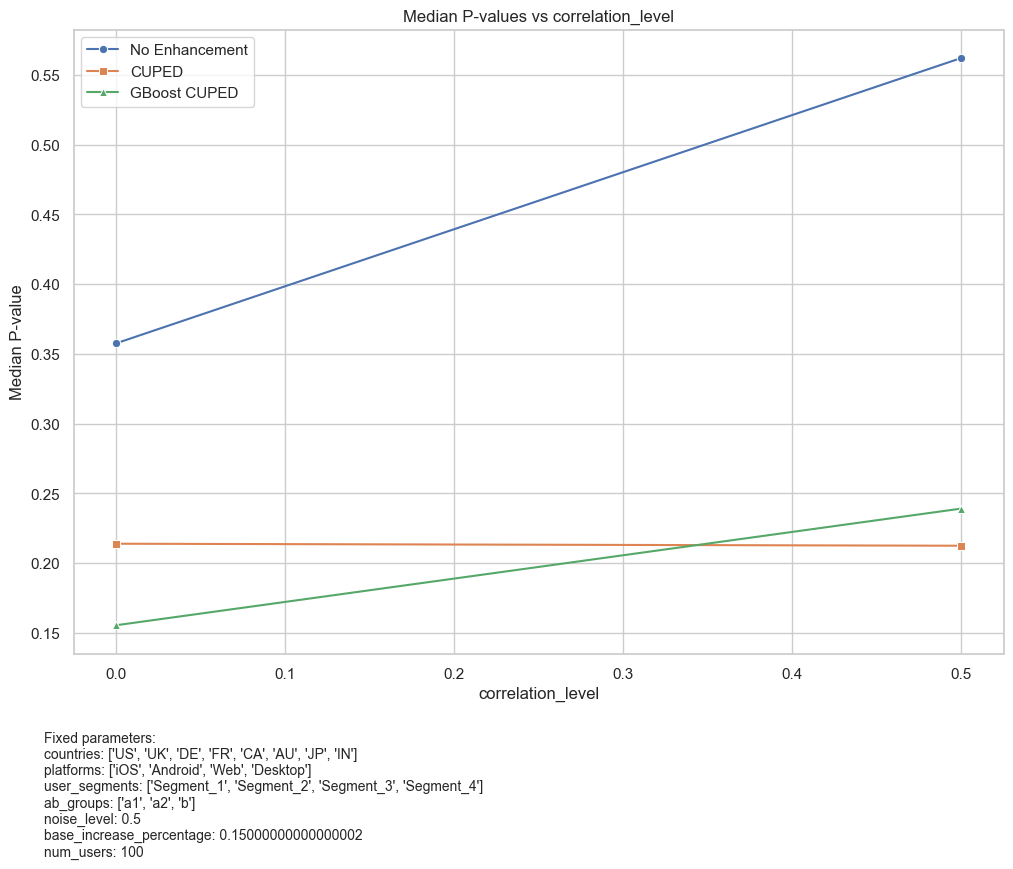

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'num_users': 1100}
100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


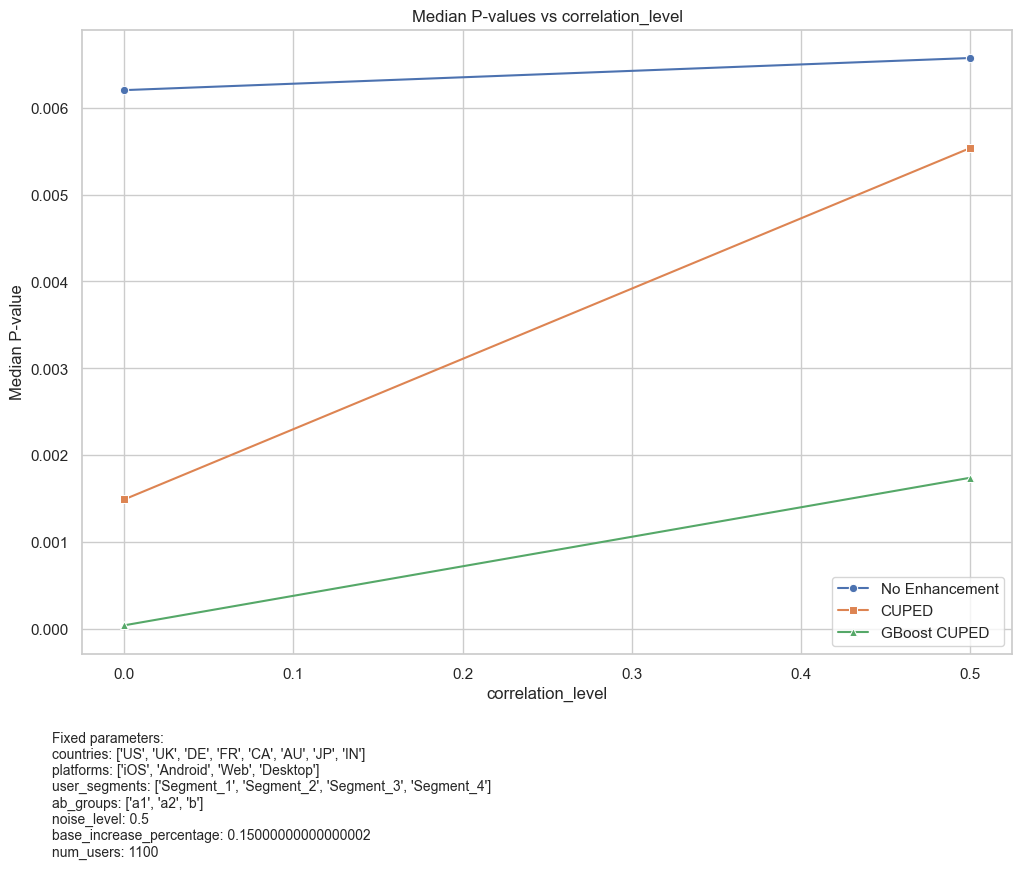

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'num_users': 2100}
100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


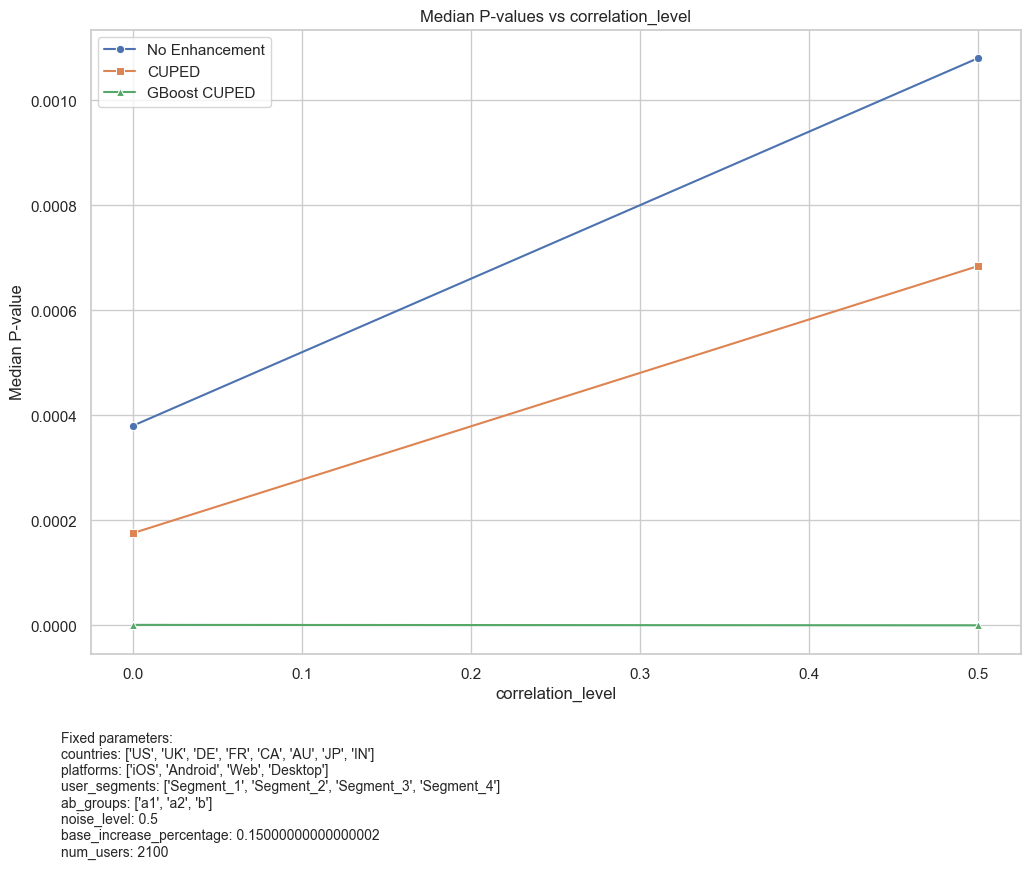

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'num_users': 3100}
100%|██████████| 2/2 [00:01<00:00,  1.25it/s]


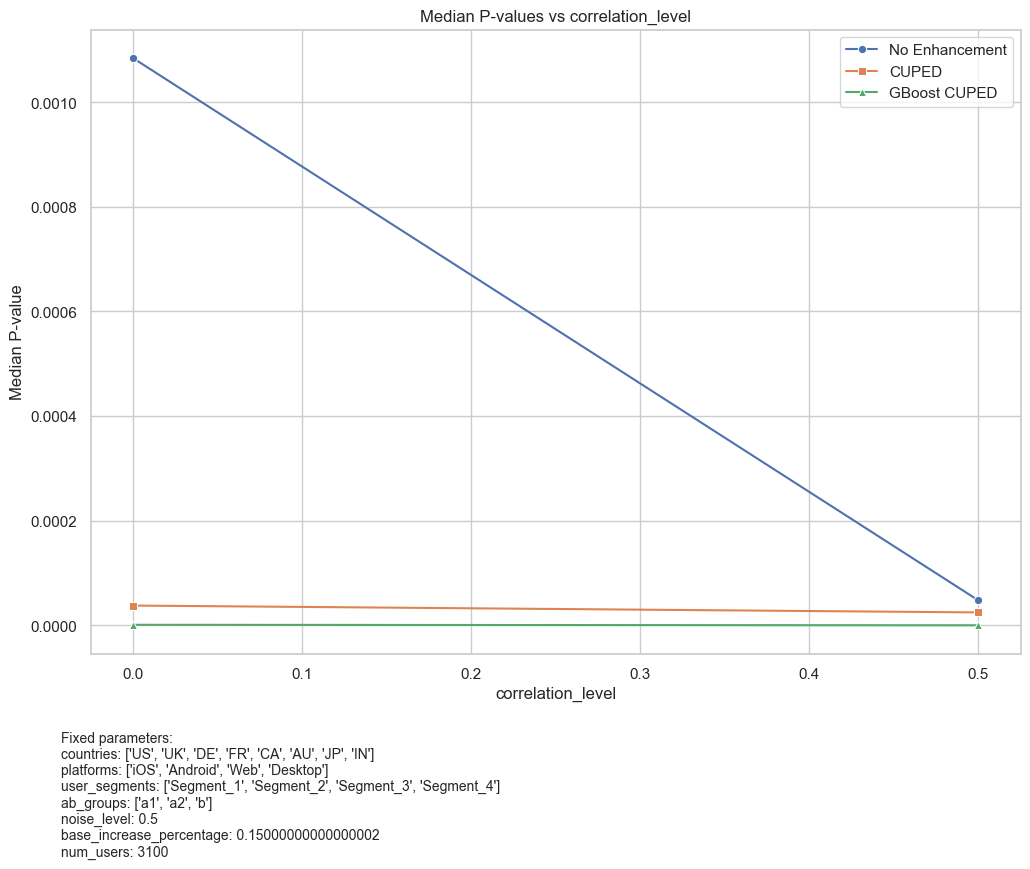

INFO:experiment_analysis.experiment_analysis:Analyzing feature 'correlation_level' with fixed params: {'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'], 'platforms': ['iOS', 'Android', 'Web', 'Desktop'], 'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'], 'ab_groups': ['a1', 'a2', 'b'], 'noise_level': 0.5, 'base_increase_percentage': 0.15000000000000002, 'num_users': 4100}
100%|██████████| 2/2 [00:01<00:00,  1.45it/s]


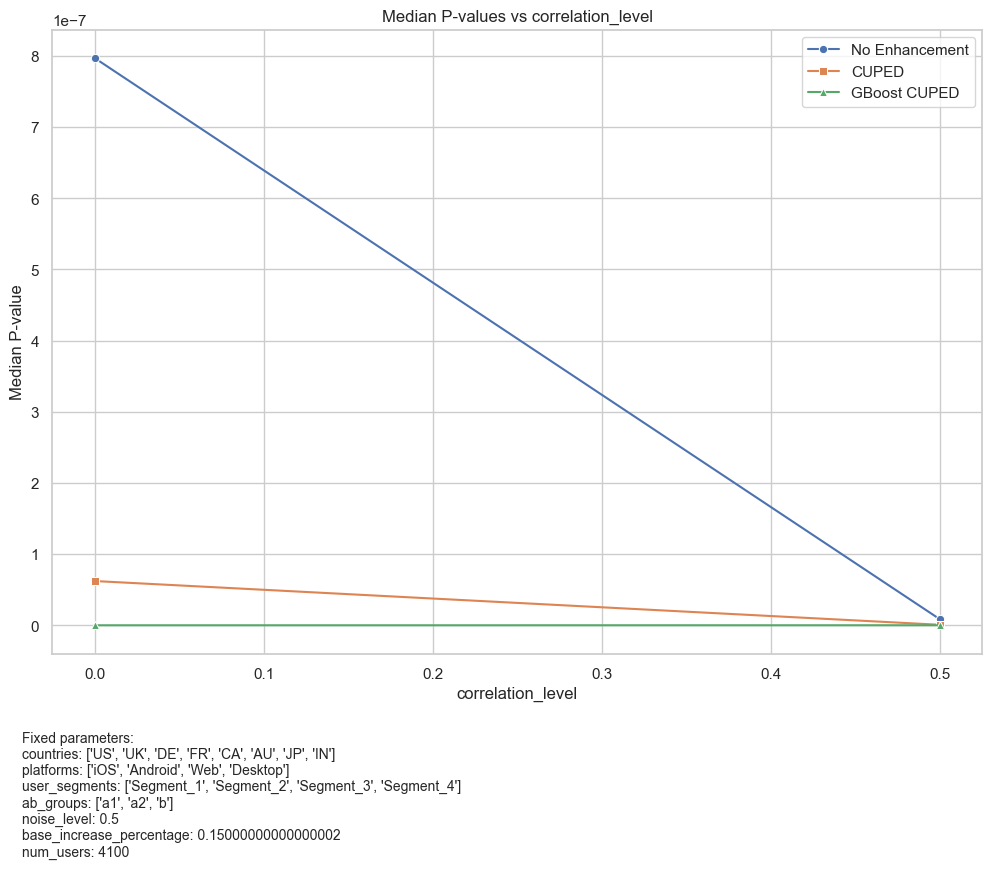

In [4]:
import numpy as np

# Go deeper and draw more charts for more features

# Define fixed parameters that do not change during the analysis
fixed_params = {
    'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],  # List of countries to be analyzed
    'platforms': ['iOS', 'Android', 'Web', 'Desktop'],  # Platforms to be included in the analysis
    'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],  # User segments to be considered
    'ab_groups': ['a1', 'a2', 'b'],  # A/B test groups
    
    'noise_level': 0.5,  # Noise level is fixed for all iterations
}

# Define parameters with ranges
varying_params = {
    'base_increase_percentage': np.arange(0.05, 0.20, 0.10),  # Range of base increase percentages to be analyzed
    'correlation_level': np.arange(0.0, 1, 0.5),
    'num_users': range(100, 5000, 1000), 
}

# Define parameters with ranges to be used as the X-axis
x_params = {
    'num_users': range(100, 5000, 1000), 
    'correlation_level': np.arange(0.0, 1, 0.5),
}

# Call the function to analyze and plot for all selected features
analyze_and_plot_features(
    fixed_params, 
    varying_params, 
    x_params, 
    num_iterations=5,  # Number of iterations to perform for each analysis
    # num_iterations=50,  # Original higher number of iterations, can be used for more thorough analysis
)
